
# **Proyecto Final**
## Data Science I : Fundamentos para la Ciencia de Datos
### Fecha: 12/11/2024


**Descripción del conjunto de datos:**

-Este conjunto de datos contiene información diaria de las ventas de un hipermercado, y se divide en varias dimensiones clave:

**Fecha de las ventas** : Cada fila representa las ventas mensuales, lo que permite un análisis temporal detallado para observar tendencias o patrones estacionales a lo largo del tiempo.

**Ventas por sector** : Las ventas están segmentadas por diferentes secciones o departamentos del hipermercado, como alimentación, electrónica, etc. Esto permite evaluar el rendimiento de cada sector individualmente.

**Tipo de venta** : El conjunto de datos distingue entre dos modalidades de venta:

**Ventas online** : Transacciones realizadas a través de la plataforma digital del hipermercado.

**Ventas en salón (físicas)** : Compras realizadas directamente en la tienda física del hipermercado.
    Con esta estructura, se pueden identificar las diferencias de comportamiento en los distintos canales de venta (online vs. físico) y cómo cada sector contribuye a las ventas totales en diferentes momentos del tiempo

**Hipótesis**:
    Dada la creciente tendencia hacia el comercio electrónico en los últimos años, especialmente tras eventos como la pandemia de COVID-19, es probable que las ventas online del hipermercado hayan mostrado un crecimiento constante y más acelerado en comparación con las ventas en tienda física. Sin embargo, las ventas por salón (físicas) podrían haberse estabilizado o haber crecido a un ritmo más lento, debido a la preferencia por la conveniencia de las compras online.
    

### Librerias

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [19]:
df = pd.read_csv('./data/Ventas_Hipermercados.csv ',delimiter=',',encoding='latin1')
df.head()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,2017-01-01,27858.872083,27477.307666,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,340777.38815,4.397544e+06,772371.84765,1.838507e+06,2.806660e+06
1,2017-02-01,25994.200168,25223.428860,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,328288.69508,4.053284e+06,672290.51653,1.257662e+06,2.354085e+06
2,2017-03-01,27780.006522,26334.263640,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,353335.15476,4.354198e+06,667696.66531,1.305675e+06,2.266189e+06
3,2017-04-01,29134.272221,27045.884463,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,359694.45374,4.355707e+06,838948.24575,1.535726e+06,2.146756e+06
4,2017-05-01,27969.004677,25631.863992,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,336568.00849,4.206102e+06,915895.14981,1.824462e+06,2.117971e+06


In [20]:
df.describe()

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
count,9.100000e+01,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,...,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,2.486051e+05,25073.582759,2.486051e+08,2.409680e+08,7.637137e+06,2.486051e+08,5.907058e+07,7.553233e+07,9.771830e+07,1.628391e+07,...,6.914337e+07,9.452719e+06,2.714691e+07,2.767942e+07,1.027427e+07,2.417308e+06,3.461930e+07,5.463690e+06,1.383591e+07,1.762469e+07
std,3.759671e+05,2405.241129,3.759671e+08,3.643841e+08,1.171777e+07,3.759671e+08,6.973403e+07,1.176470e+08,1.591278e+08,3.118722e+07,...,1.078189e+08,1.532160e+07,4.210474e+07,4.136213e+07,1.643654e+07,3.673843e+06,5.418481e+07,8.096128e+06,1.797554e+07,2.508735e+07
min,2.599420e+04,20588.467376,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1.044014e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,9.522033e+05,3.282887e+05,4.053284e+06,6.676967e+05,1.257662e+06,2.117971e+06
25%,4.472080e+04,23531.709159,4.472080e+07,4.399557e+07,7.054800e+05,4.472080e+07,1.544006e+07,1.141034e+07,1.611570e+07,1.749511e+06,...,1.162006e+07,1.613281e+06,4.865841e+06,4.522429e+06,1.558414e+06,4.743304e+05,6.856021e+06,1.163863e+06,2.515049e+06,3.735956e+06
50%,8.922428e+04,24627.553412,8.922428e+07,8.462260e+07,3.944359e+06,8.922428e+07,2.796047e+07,2.355189e+07,3.325370e+07,4.710872e+06,...,2.363307e+07,2.954223e+06,1.004335e+07,9.440006e+06,3.508832e+06,7.575313e+05,1.260647e+07,2.199429e+06,6.042114e+06,7.203809e+06
75%,2.301843e+05,26349.825352,2.301843e+08,2.223969e+08,7.787348e+06,2.301843e+08,6.744635e+07,6.955867e+07,8.432692e+07,9.235561e+06,...,6.490637e+07,8.512071e+06,2.547988e+07,2.640177e+07,8.840863e+06,2.268291e+06,3.062566e+07,5.500402e+06,1.624666e+07,1.764076e+07
max,1.588238e+06,34084.519434,1.588238e+09,1.537266e+09,5.184859e+07,1.588238e+09,2.902971e+08,4.650090e+08,6.888194e+08,1.472671e+08,...,4.558004e+08,6.772835e+07,1.900557e+08,1.663499e+08,7.201404e+07,1.632353e+07,2.206922e+08,4.174498e+07,8.621302e+07,1.037395e+08


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        91 non-null     object 
 1   ventas_precios_corrientes            91 non-null     float64
 2   ventas_precios_constantes            91 non-null     float64
 3   ventas_totales_canal_venta           91 non-null     float64
 4   salon_ventas                         91 non-null     float64
 5   canales_on_line                      91 non-null     float64
 6   ventas_totales_medio_pago            91 non-null     float64
 7   efectivo                             91 non-null     float64
 8   tarjetas_debito                      91 non-null     float64
 9   tarjetas_credito                     91 non-null     float64
 10  otros_medios                         91 non-null     float64
 11  ventas_totales_grupo_articulos    


## Visualización - Armado de graficos

In [22]:
df.shape

(91, 24)

In [23]:
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'],errors='coerce')#Pasamos a fecha la columna indice de tiempo
df['Año'] = df['indice_tiempo'].dt.year#Agregamos una columna Año
df['mes'] = df['indice_tiempo'].dt.month#Agregamos una columna Mes
df.index = df['Año']#Tomo como indice la columna años del txt
df = df.drop('Año', axis='columns')#Elimino la columna años
df.head()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros,mes
Año,,,,,,,,,,,,,,,,,,,,,
2017,2017-01-01,27858.872083,27477.307666,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,340777.38815,4.397544e+06,772371.84765,1.838507e+06,2.806660e+06,1
2017,2017-02-01,25994.200168,25223.428860,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,328288.69508,4.053284e+06,672290.51653,1.257662e+06,2.354085e+06,2
2017,2017-03-01,27780.006522,26334.263640,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,353335.15476,4.354198e+06,667696.66531,1.305675e+06,2.266189e+06,3
2017,2017-04-01,29134.272221,27045.884463,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,359694.45374,4.355707e+06,838948.24575,1.535726e+06,2.146756e+06,4
2017,2017-05-01,27969.004677,25631.863992,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,336568.00849,4.206102e+06,915895.14981,1.824462e+06,2.117971e+06,5


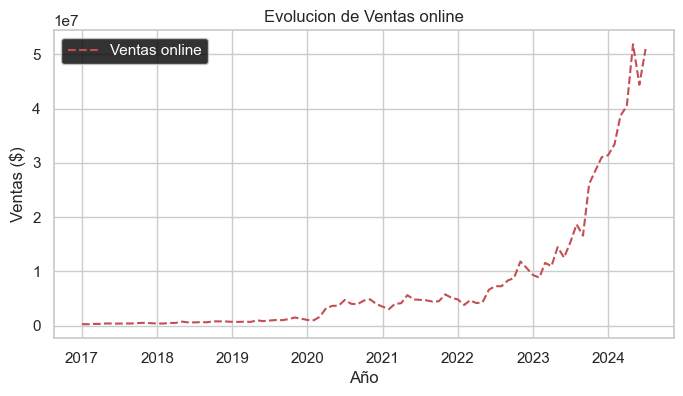

In [24]:
ventas = df['canales_on_line']
fig, ax = plt.subplots(figsize=(8,4))
x = df['indice_tiempo'] #el index son los años
plt.style.use("dark_background")
ax.plot(x, ventas, label='Ventas online',color='r',linestyle='--')
ax.set_xlabel('Año')                  
ax.set_ylabel('Ventas ($)')
ax.set_title('Evolucion de Ventas online')
ax.legend() 


El gráfico presenta una clara tendencia ascendente en las ventas en línea coincidiendo con la aparición de la pandemia de COVID-19. A partir de mediados de dicho período, se observa un incremento sostenido en el volumen de ventas, lo que refleja un cambio significativo en los hábitos de consumo. Este fenómeno puede atribuirse a las restricciones de movilidad y las medidas de distanciamiento social, que impulsaron a los consumidores a adoptar el comercio electrónico como alternativa principal para la adquisición de bienes y servicios. Además, el contexto pandémico aceleró la transformación digital en diversas industrias, destacando la capacidad del comercio electrónico para adaptarse a las nuevas demandas del mercado. En resumen, el gráfico evidencia cómo la pandemia actuó como catalizador en la expansión de las ventas online, marcando un antes y un después en las dinámicas de consumo a nivel global.

Text(0, 0.5, 'Ventas online')

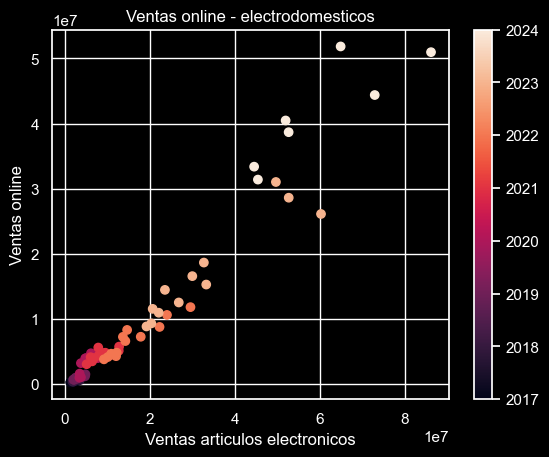

In [25]:
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df['electronicos_articulos_hogar'], df['canales_on_line'], c=df.index)
fig.colorbar(mapeo_colores)
plt.style.use("dark_background")
ax.set_title('Ventas online - electrodomesticos')
ax.set_xlabel('Ventas articulos electronicos')
ax.set_ylabel('Ventas online')

El gráfico evidencia una marcada tendencia al alza en las ventas en línea de electrodomésticos a partir de la aparición de la pandemia de COVID-19. A mediados de este período, se observa un incremento sostenido que coincide con las medidas de confinamiento y las restricciones de movilidad, las cuales obligaron a los consumidores a pasar más tiempo en sus hogares. Este fenómeno impulsó una mayor demanda de electrodomésticos, ya que las personas buscaron equipar sus espacios para facilitar actividades cotidianas como el trabajo remoto, la cocina y el entretenimiento. El crecimiento en este sector también refleja la adaptación del mercado al entorno digital, con una mayor oferta y facilidad de compra a través de plataformas en línea. En síntesis, la pandemia no solo provocó un cambio en los hábitos de consumo, sino que también impulsó el crecimiento del comercio electrónico de electrodomésticos, consolidando este canal como una opción preferida por los consumidores

([<matplotlib.patches.Wedge at 0x245996527d0>,
 [Text(0.8075012296937758, 0.7469549946570009, 'EFECTIVO'),
  Text(-0.8454474506456022, 0.703717704905065, 'TARJETAS DEBITO'),
  Text(-0.0830957517689787, -1.0968569168482953, 'CREDITO'),
  Text(1.0767925519319763, -0.2247616517643126, 'OTRO MEDIO DE PAGO')])

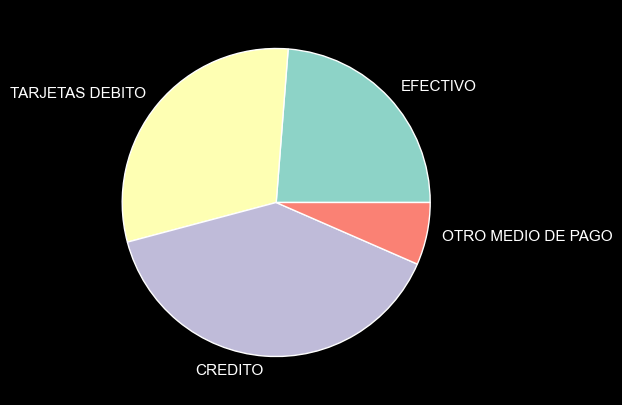

In [26]:
MEDIO_PAGO = ['EFECTIVO', 'TARJETAS DEBITO', 'CREDITO','OTRO MEDIO DE PAGO']
data = [df['efectivo'].sum(),df['tarjetas_debito'].sum(),df['tarjetas_credito'].sum(),df['otros_medios'].sum()]

fig,ax = plt.subplots(figsize =(5, 5))
ax.pie(data, labels = MEDIO_PAGO,)

El gráfico de torta muestra que la mayor proporción de los pagos se realiza mediante tarjeta, lo que indica una preferencia significativa de los consumidores por este método. Este resultado refleja una tendencia hacia la digitalización de los pagos, impulsada en gran parte por la conveniencia y seguridad que ofrecen las tarjetas de débito y crédito. La disminución en el uso de otros medios, como el efectivo, sugiere un cambio en los hábitos de consumo, probablemente influenciado por factores como la expansión del comercio electrónico y las medidas sanitarias impuestas durante la pandemia de COVID-19. En resumen, la predominancia del pago con tarjeta destaca la importancia de las soluciones financieras digitales en el contexto

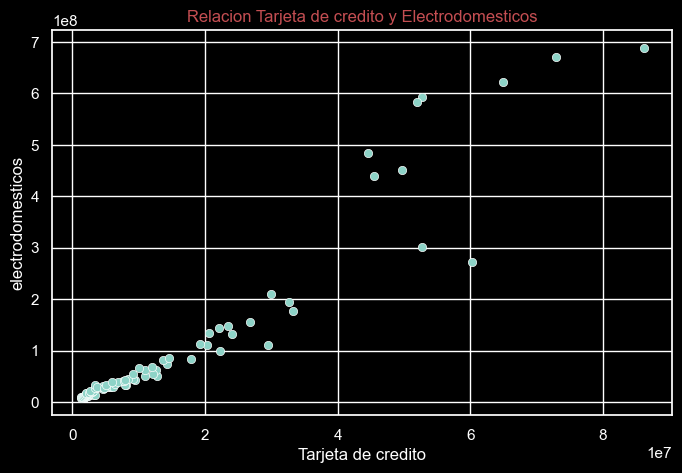

In [27]:
# Definimos las variables
Venta_electronica = df["electronicos_articulos_hogar"]
Pago_tarjeta_de_credito = df["tarjetas_credito"]

fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=Venta_electronica, y=Pago_tarjeta_de_credito)

# Definimos el titulo del Scatterplot
plt.title("Relacion Tarjeta de credito y Electrodomesticos",color='r')
# Definimos la etiqueta del eje x
plt.xlabel("Tarjeta de credito")
# Definimos la etiqueta del eje y
plt.ylabel("electrodomesticos")
# Imprimimos el gráfico
plt.show()

El gráfico de dispersión que muestra la relación entre las ventas de electrodomésticos y las compras por tarjeta de crédito, podríamos ver cómo estas dos variables se comportan durante el período de la pandemia de COVID-19.
Incremento en el uso de tarjetas de crédito: Debido a la limitación del contacto físico y el aumento de las compras en línea, el uso de tarjetas de crédito para comprar bienes, incluidos los electrodomésticos, se disparó.

Text(0.5, 1.0, 'Evolución de Ventas de Almacen a lo largo del Tiempo')

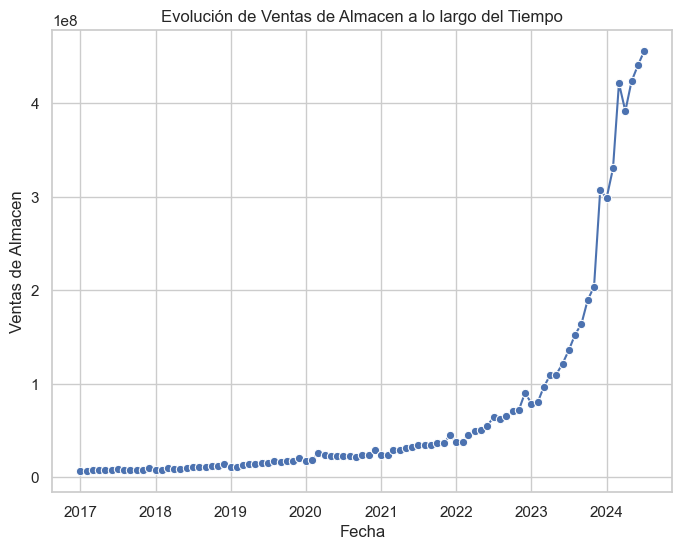

In [28]:
df['fecha'] = pd.to_datetime(df['indice_tiempo'])
# Crear gráfico de líneas
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
# Graficar las ventas de almacen
sns.lineplot(x='fecha', y='almacen', data=df, marker='o')

plt.xlabel('Fecha')
plt.ylabel('Ventas de Almacen')
plt.title('Evolución de Ventas de Almacen a lo largo del Tiempo')

El aumento de consumo post-pandemia puede deberse a varios factores: la gente comenzó a gastar más debido a la acumulación de ahorros durante los confinamientos, y con la vuelta a la normalidad, hubo una necesidad renovada de mejorar sus espacios y adquirir productos que quizás pospusieron comprar. Todo esto junto podría haber impulsado ese pico en las ventas.

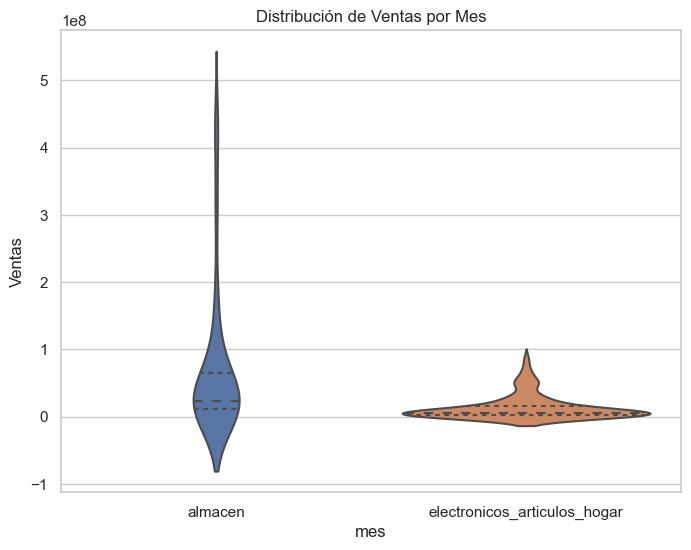

In [29]:
# Crear un DataFrame en formato largo para usar con Seaborn
df_melted = df.melt(id_vars=['fecha'], value_vars=['almacen', 'electronicos_articulos_hogar'], 
                    var_name='mes', value_name='ventas')

# Crear gráfico de violín
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

# Graficar las ventas
sns.violinplot(x='mes', y='ventas', data=df_melted, inner='quartile')

plt.xlabel('mes')
plt.ylabel('Ventas')
plt.title('Distribución de Ventas por Mes')
plt.show()


Este grafico muestra no solo muestra la distribución de los datos, sino también su densidad y los valores cuartiles

# **Machine Learning**

Implementación de Algoritmos de Machine Learning para la Predicción de Ventas Futuras

En el presente informe, describimos el proceso de implementación de algoritmos de machine learning para la predicción de ventas futuras en diferentes categorías de productos. El objetivo es proporcionar una herramienta precisa y eficaz que permita una mejor planificación y toma de decisiones estratégicas en el negocio.

## Definicion de objetivo

El objetivo de este análisis es proyectar las ventas futuras de un hipermercado durante y después de la pandemia de COVID-19. Esto nos permitirá identificar patrones, tendencias y factores clave que influyen en el comportamiento de compra de los consumidores, con el fin de tomar decisiones informadas que optimicen la estrategia comercial del hipermercado

## Contexto comercial

La pandemia de COVID-19 ha tenido un impacto significativo en el comercio minorista a nivel mundial. Las restricciones de movilidad, los cambios en los hábitos de consumo y el aumento del comercio electrónico son algunos de los factores que han afectado las ventas de los hipermercados. Durante la pandemia, los consumidores priorizaron la compra de productos esenciales, como alimentos y artículos de limpieza, mientras que las categorías no esenciales experimentaron una disminución en la demanda. A medida que las restricciones se han ido levantando y la situación sanitaria mejora, es importante evaluar cómo estos cambios han influido en las ventas y qué tendencias se mantendrán en el futuro.

## Contexto analitico

Para llevar a cabo este análisis, utilizaremos técnicas de análisis de datos y modelos de predicción basados en series temporales. Se analizarán datos históricos de ventas, tanto de la pandemia como del período pospandemia, con el fin de identificar patrones estacionales y tendencias a largo plazo. Los resultados de este análisis permitirán generar proyecciones precisas y recomendaciones estratégicas para el hipermercado.


In [30]:
# Eliminamos del conjunto de datos la primer columna que contiene datos que no son útiles
data = df.iloc[:, 11:-2]
data

,ventas_totales_grupo_articulos,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
Año,,,,,,,,,,,,,
2017,2.785887e+07,1.804379e+07,3.514467e+06,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
2017,2.599420e+07,1.765688e+07,3.344457e+06,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2017,2.778001e+07,1.918625e+07,3.290739e+06,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
2017,2.913427e+07,2.025714e+07,3.253288e+06,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
2017,2.796900e+07,1.890457e+07,2.869437e+06,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,1.422933e+09,1.037827e+09,1.766536e+08,4.216108e+08,5.837004e+07,1.553741e+08,1.528342e+08,5.973739e+07,1.324709e+07,2.192726e+08,1.890130e+07,5.268233e+07,9.424957e+07
2024,1.335118e+09,9.732782e+08,1.478185e+08,3.917619e+08,5.441253e+07,1.574919e+08,1.497441e+08,5.933288e+07,1.271647e+07,2.002970e+08,2.514833e+07,5.197224e+07,8.442240e+07
2024,1.412880e+09,1.020655e+09,1.401197e+08,4.235807e+08,5.894462e+07,1.699988e+08,1.538855e+08,6.057147e+07,1.355402e+07,2.074317e+08,3.425556e+07,6.492758e+07,8.560995e+07


In [31]:
# Renombraremos las columnas del df 
nombres_nuevos = {'ventas_totales_grupo_articulos': 'VTA_TOTAL',
                  'subtotal_ventas_alimentos_bebidas': 'Subtotal_comestible',
                  'bebidas': 'BEBIDAS',
                  'almacen': 'ALMACEN',
                  'panaderia': 'PANADERIA',
                  'lacteos': 'LACTEOS',
                  'carnes': 'CARNICERIA',
                  'verduleria_fruteria': 'FYV',
                  'alimentos_preparados_rotiseria': 'ROTISERIA',
                  'articulos_limpieza_perfumeria': 'LIMPIEZA',
                  'indumentaria_calzado_textiles_hogar': 'INDUMENTARIA',
                  'electronicos_articulos_hogar': 'ELECTRONICA',
                  'otros': 'OTROS'
                 }
data.rename(columns=nombres_nuevos, inplace=True)
data = data.drop('Subtotal_comestible', axis=1)
data


,VTA_TOTAL,BEBIDAS,ALMACEN,PANADERIA,LACTEOS,CARNICERIA,FYV,ROTISERIA,LIMPIEZA,INDUMENTARIA,ELECTRONICA,OTROS
Año,,,,,,,,,,,,
2017,2.785887e+07,3.514467e+06,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
2017,2.599420e+07,3.344457e+06,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2017,2.778001e+07,3.290739e+06,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
2017,2.913427e+07,3.253288e+06,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
2017,2.796900e+07,2.869437e+06,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2024,1.422933e+09,1.766536e+08,4.216108e+08,5.837004e+07,1.553741e+08,1.528342e+08,5.973739e+07,1.324709e+07,2.192726e+08,1.890130e+07,5.268233e+07,9.424957e+07
2024,1.335118e+09,1.478185e+08,3.917619e+08,5.441253e+07,1.574919e+08,1.497441e+08,5.933288e+07,1.271647e+07,2.002970e+08,2.514833e+07,5.197224e+07,8.442240e+07
2024,1.412880e+09,1.401197e+08,4.235807e+08,5.894462e+07,1.699988e+08,1.538855e+08,6.057147e+07,1.355402e+07,2.074317e+08,3.425556e+07,6.492758e+07,8.560995e+07


In [32]:
data.columns

Index(['VTA_TOTAL', 'BEBIDAS', 'ALMACEN', 'PANADERIA', 'LACTEOS', 'CARNICERIA',
       'FYV', 'ROTISERIA', 'LIMPIEZA', 'INDUMENTARIA', 'ELECTRONICA', 'OTROS'],
      dtype='object')

## Tratamiento de Outliers

In [33]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identificación de outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
print(outliers)


      VTA_TOTAL  BEBIDAS  ALMACEN  PANADERIA  LACTEOS  CARNICERIA    FYV  \
Año                                                                        
2017      False    False    False      False    False       False  False   
2017      False    False    False      False    False       False  False   
2017      False    False    False      False    False       False  False   
2017      False    False    False      False    False       False  False   
2017      False    False    False      False    False       False  False   
...         ...      ...      ...        ...      ...         ...    ...   
2024       True     True     True       True     True        True   True   
2024       True     True     True       True     True        True   True   
2024       True     True     True       True     True        True   True   
2024       True     True     True       True     True        True   True   
2024       True     True     True       True     True        True   True   

      ROTIS

In [34]:
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_transformed = data.apply(np.log)
for col in data.columns:
    col_values = data[col]
    data.loc[col_values < (Q1[col] - 1.5 * IQR[col]), col] = Q1[col] - 1.5 * IQR[col]
    data.loc[col_values > (Q3[col] + 1.5 * IQR[col]), col] = Q3[col] + 1.5 * IQR[col]

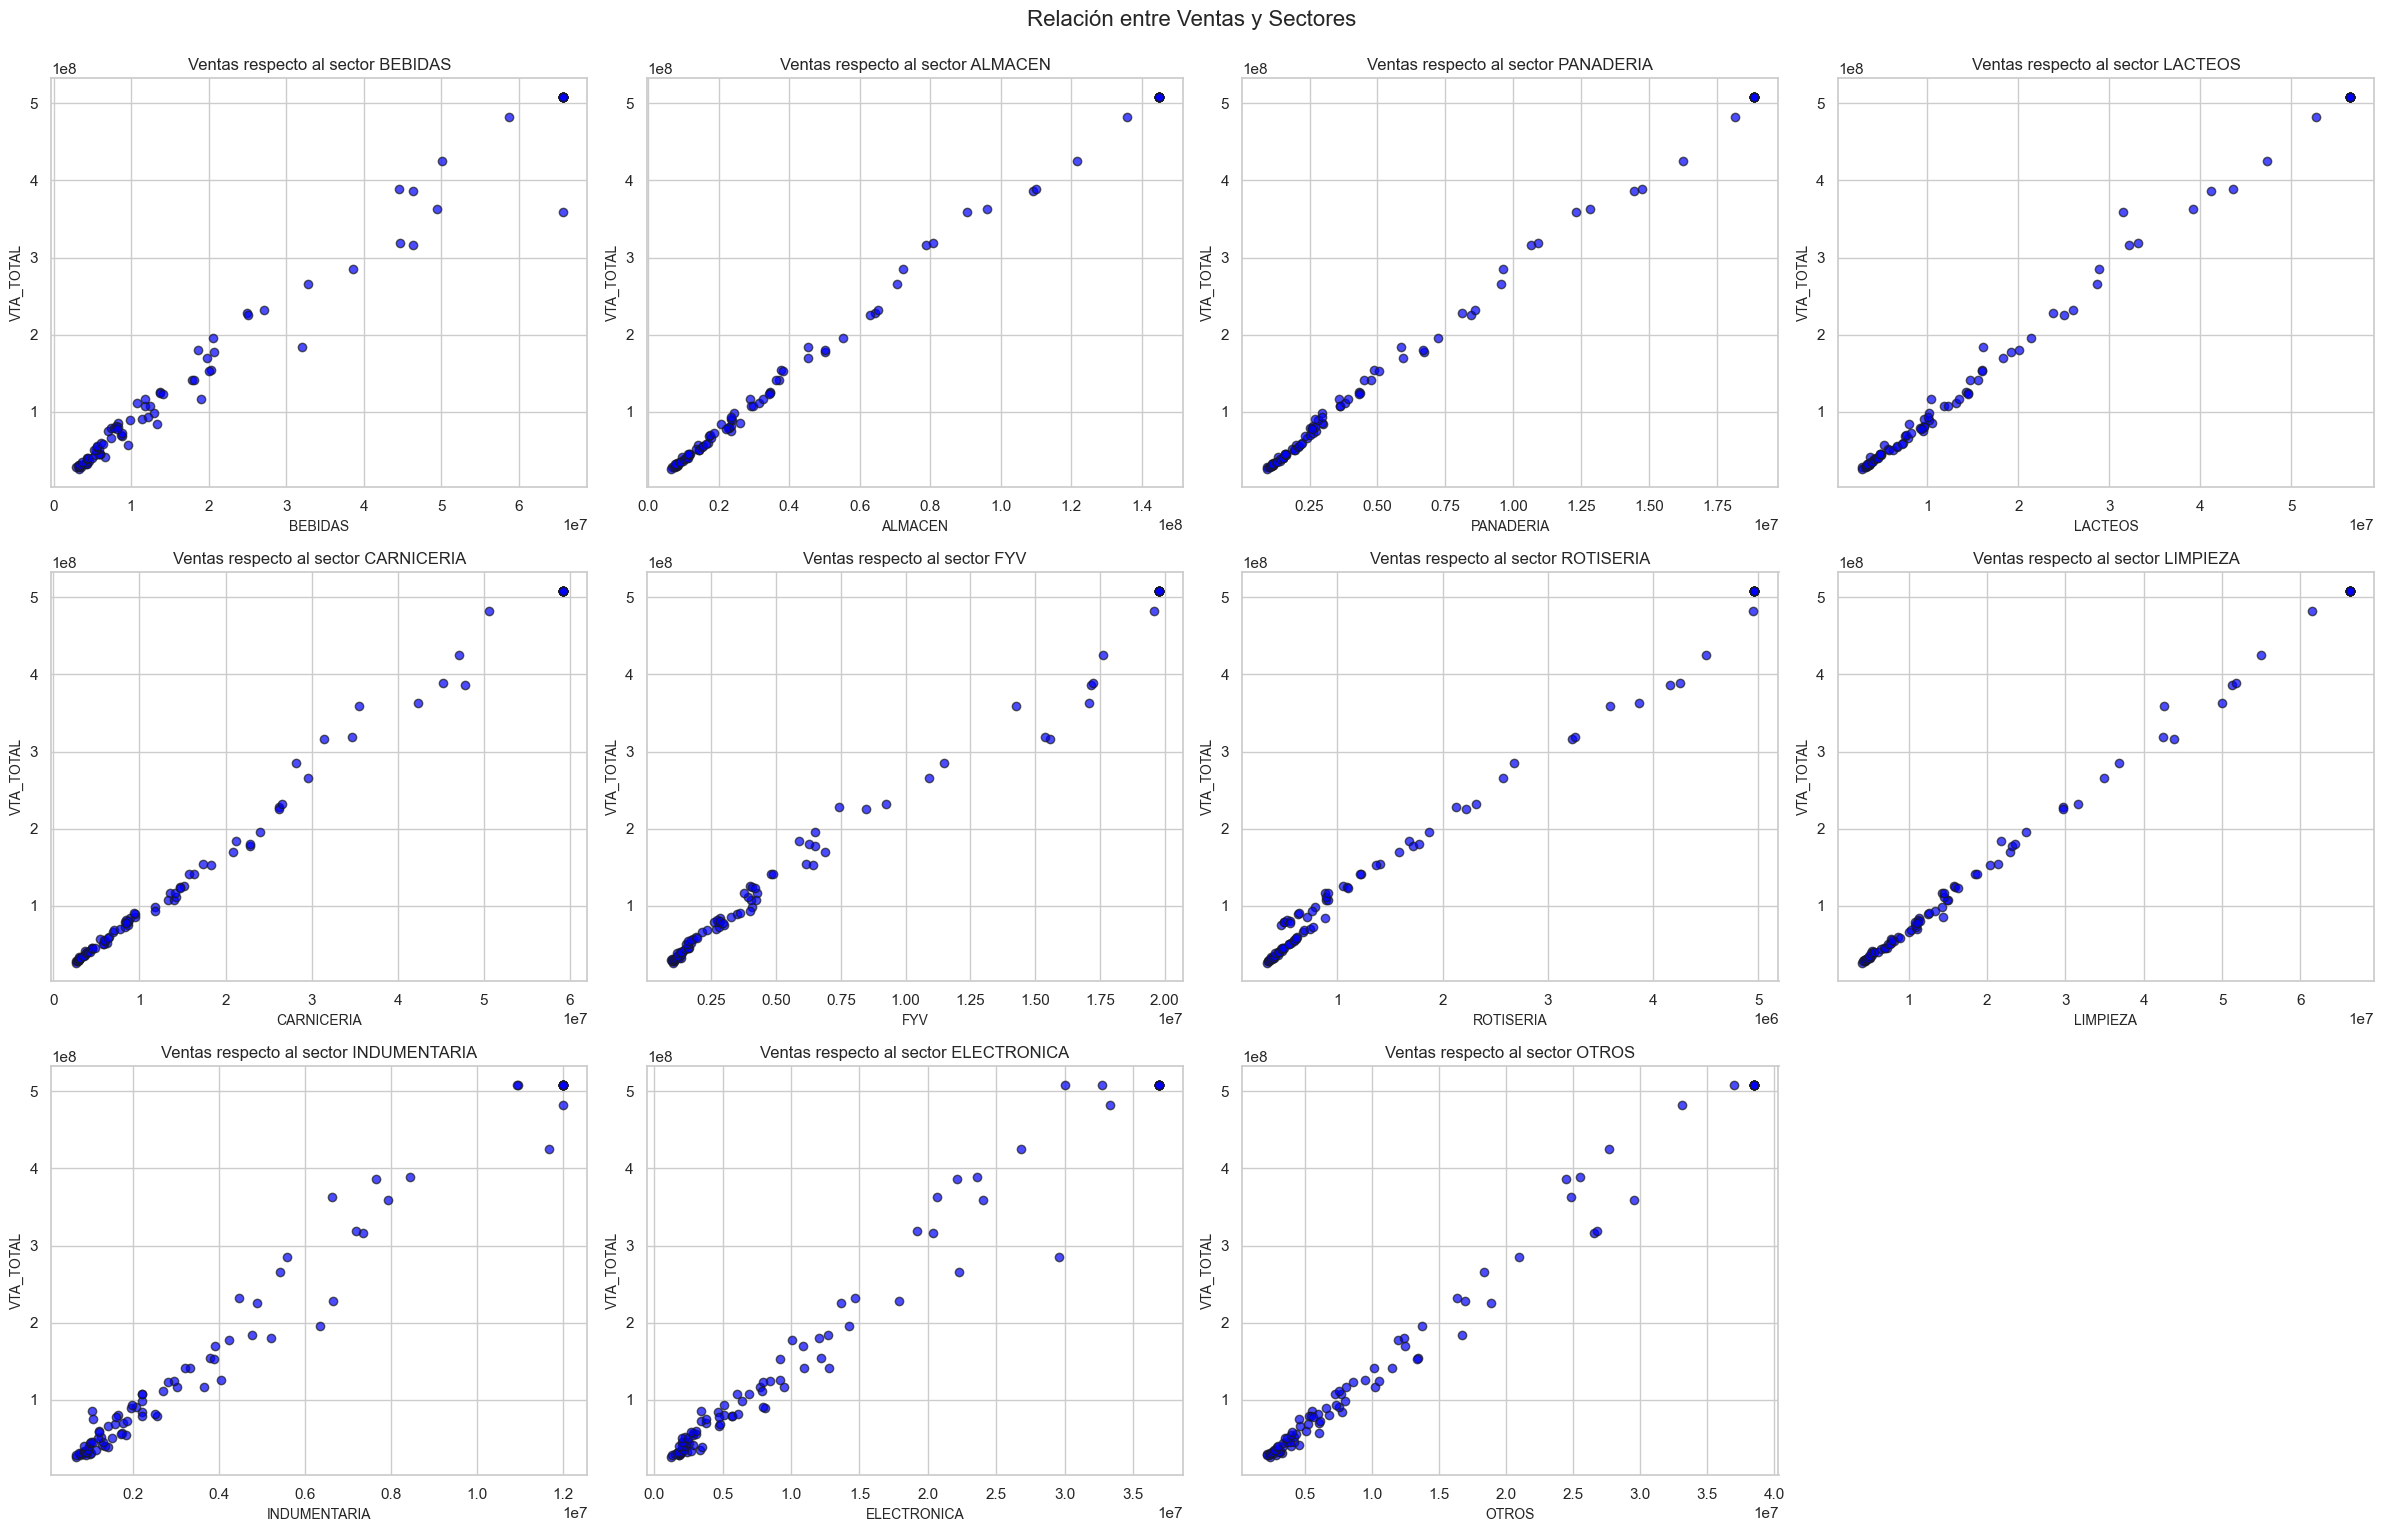

In [35]:
col = data.iloc[:, 1:].columns

# Crear una figura y ejes con 3 filas y 4 columnas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 15))
axes = axes.flatten()

# Iterar sobre las columnas y los ejes para crear gráficos
for i, column in enumerate(col):
    if i < 12:  # Ajustado para 12 gráficos (4 por fila)
        axes[i].scatter(data[column], data['VTA_TOTAL'], color='blue', edgecolor='k', alpha=0.7)
        axes[i].set_title(f'Ventas respecto al sector {column}', fontsize=12)
        axes[i].set_xlabel(column, fontsize=10)
        axes[i].set_ylabel('VTA_TOTAL', fontsize=10)
    else:
        # Crear un nuevo gráfico si hay más de 12 columnas
        fig_extra, ax_extra = plt.subplots(figsize=(8, 6))
        ax_extra.scatter(data[column], data['VTA_TOTAL'], color='blue', edgecolor='k', alpha=0.7)
        ax_extra.set_title(f'Ventas respecto al sector {column}', fontsize=12)
        ax_extra.set_xlabel(column, fontsize=10)
        ax_extra.set_ylabel('VTA_TOTAL', fontsize=10)
        plt.tight_layout()
        plt.show()

# Eliminar los ejes vacíos si existen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar superposición
plt.tight_layout()
plt.suptitle('Relación entre Ventas y Sectores', fontsize=16, y=1.02)
plt.show()




C:\Users\davyd\AppData\Local\Temp\ipykernel_11480\1071712932.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=plt.gca())


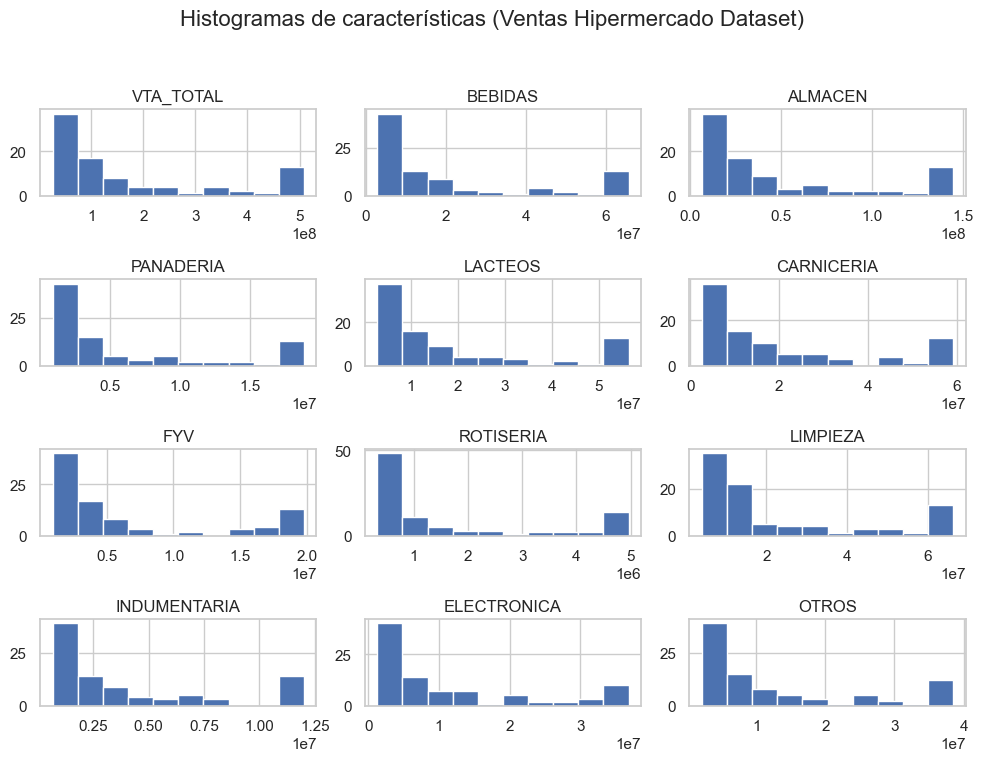

In [36]:
# Histograma de características
plt.figure(figsize=(10, 8))
data.hist(ax=plt.gca()) 
plt.suptitle("Histogramas de características (Ventas Hipermercado Dataset)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Reducción de Dimensionalidad:

### Análisis de Componentes Principales PCA

Porcentaje de varianza explicada por cada componente
[9.90680121e-01 3.10971186e-03 2.90433348e-03 1.45190340e-03
 8.81806889e-04 4.69278162e-04 2.54072582e-04 1.74080563e-04
 4.54520045e-05 2.26141546e-05 6.62629656e-06]


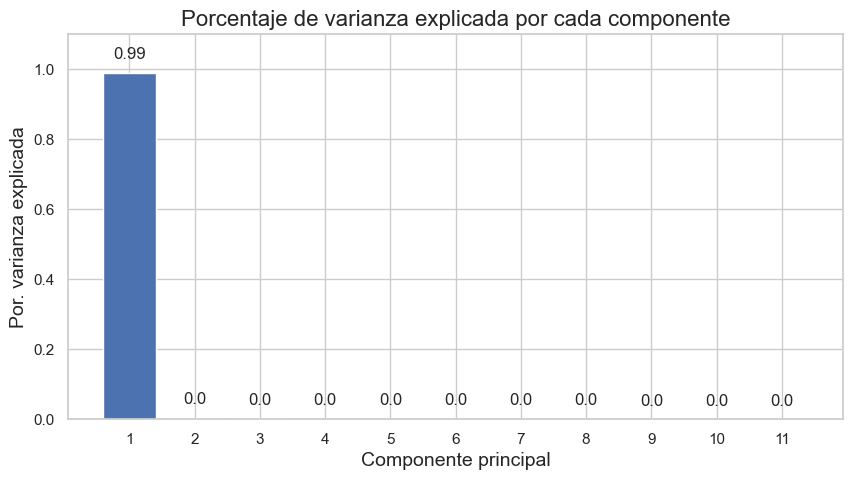

In [38]:

sns.set_style("whitegrid")

# Seleccionar las características relevantes
features = [
    'BEBIDAS', 'ALMACEN', 'PANADERIA',
    'LACTEOS', 'CARNICERIA', 'FYV', 'ROTISERIA', 'LIMPIEZA', 'INDUMENTARIA',
    'ELECTRONICA', 'OTROS'
]

# Crear el pipeline de PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())

# Ajustar el pipeline a los datos seleccionados
X = data[features]
pca_pipe.fit(X)

# Se extrae el modelo PCA entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
explained_variance_ratio = modelo_pca.explained_variance_ratio_
print(explained_variance_ratio)

# Visualizar el porcentaje de varianza explicada por cada componente
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1, height = explained_variance_ratio)
for x, y in zip(np.arange(len(features)) + 1, explained_variance_ratio):
    label = round(y, 2)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=16)
ax.set_xlabel('Componente principal', fontsize=14)
ax.set_ylabel('Por. varianza explicada', fontsize=14)
plt.show()

El resultado que se obtuvo, con la primera componente principal explicando el 99% de la varianza, no necesariamente indica un error. Esto puede ocurrir en datasets donde una o varias características tienen una alta correlación entre sí, lo que hace que la mayor parte de la varianza pueda ser capturada por las primeras componentes principales.



## Matriz de correlación

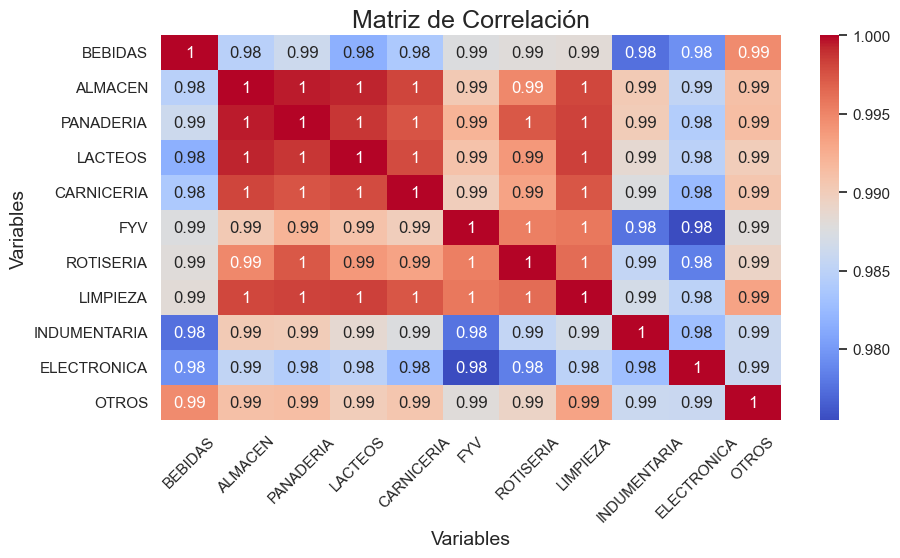

In [39]:
# Visualizar la matriz de correlación
correlation_matrix = X.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

El resultado de la matriz de correlacion explica por qué la primera componente principal del PCA es grande la varianza. Cuando hay alta correlación entre las variables, el PCA tiende a condensar la mayor parte de la variabilidad en las primeras componentes principales.

Para simplificar el análisis y mejorar la precisión del modelo, las ventas se han agrupado en las categorías mencionadas:

**Comestible** = Bebidas + Almacén + Panadería + Lácteos + Carnes + Verdulería/Frutería

**Higiene** = Artículos de Limpieza y Perfumería

**Indumentaria** = Indumentaria, Calzado y Textiles para el Hogar

**Electrónica** = Electrónicos y Artículos para el Hogar

**Otros** = Otros

**Total_Venta** = ventas_totales_grupo_articulos

In [40]:
# Crear nuevas columnas agrupadas
data['comestible'] = data['BEBIDAS'] + data['ALMACEN'] + data['PANADERIA'] + data['LACTEOS'] + data['CARNICERIA'] + data['FYV'] + data['ROTISERIA']
data['higiene'] = data['LIMPIEZA']
data['indumentaria'] = data['INDUMENTARIA']
data['electronica'] = data['ELECTRONICA']
data['otros'] = data['OTROS']

# Filtrar solo las nuevas columnas agrupadas (opcional)
data = data[['comestible', 'higiene', 'indumentaria', 'electronica', 'otros','VTA_TOTAL']]


# Mostrar el dataframe agrupado
print(data.head())


        comestible       higiene  indumentaria   electronica         otros  \
Año                                                                          
2017  1.804379e+07  4.397544e+06  772371.84765  1.838507e+06  2.806660e+06   
2017  1.765688e+07  4.053284e+06  672290.51653  1.257662e+06  2.354085e+06   
2017  1.918625e+07  4.354198e+06  667696.66531  1.305675e+06  2.266189e+06   
2017  2.025714e+07  4.355707e+06  838948.24575  1.535726e+06  2.146756e+06   
2017  1.890457e+07  4.206102e+06  915895.14981  1.824462e+06  2.117971e+06   

         VTA_TOTAL  
Año                 
2017  2.785887e+07  
2017  2.599420e+07  
2017  2.778001e+07  
2017  2.913427e+07  
2017  2.796900e+07  


### Creación de los modelos de Regresión lineal simple

Primero crearemos los modelos de regresión lineal simple utilizando cada una de las variables independientes de nuestro conjunto de datos.

Para poder comparar rapidamente los valores independientes reamos una funcion 'Valor_ind'

In [44]:
def Valor_ind(independiente):
    # Preparar los datos
    X = data[independiente].values.reshape(-1, 1)
    y = data['VTA_TOTAL'].values

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entrenar el modelo de regresión lineal
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)

    # Calcular métricas de evaluación
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Imprimir resultados
    print("VTA_TOTAL VS ", independiente)
    print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))
    print("RMSE :", rmse)
    print('R2 :', r2)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', edgecolor='k', alpha=0.7, label='Datos Reales')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones del Modelo')
    plt.title(f'Modelo VTA TOTAL vs {independiente}', fontsize=16)
    plt.xlabel(independiente, fontsize=14)
    plt.ylabel('VTA_TOTAL', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()



c:\Users\davyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


VTA_TOTAL VS  comestible
Predicciones: [7.86897294e+07 4.66522909e+07 1.23708808e+08 5.12222353e+08], Reales: [7.85945218e+07 4.48494460e+07 1.24840320e+08 5.08379434e+08]
RMSE : 4796880.160600509
R2 : 0.9989094102676315


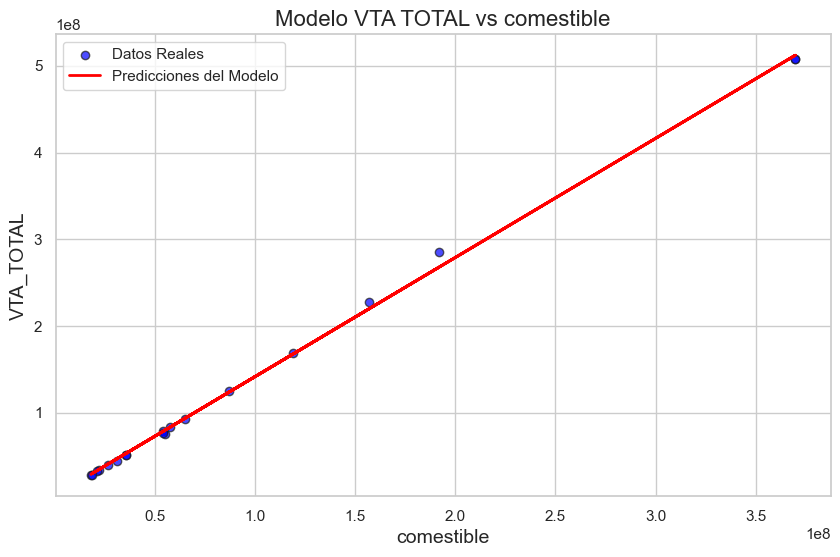

c:\Users\davyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


VTA_TOTAL VS  higiene
Predicciones: [8.08149976e+07 4.70507116e+07 1.17748194e+08 5.08525946e+08], Reales: [7.85945218e+07 4.48494460e+07 1.24840320e+08 5.08379434e+08]
RMSE : 3031610.0128970114
R2 : 0.9995643975309224


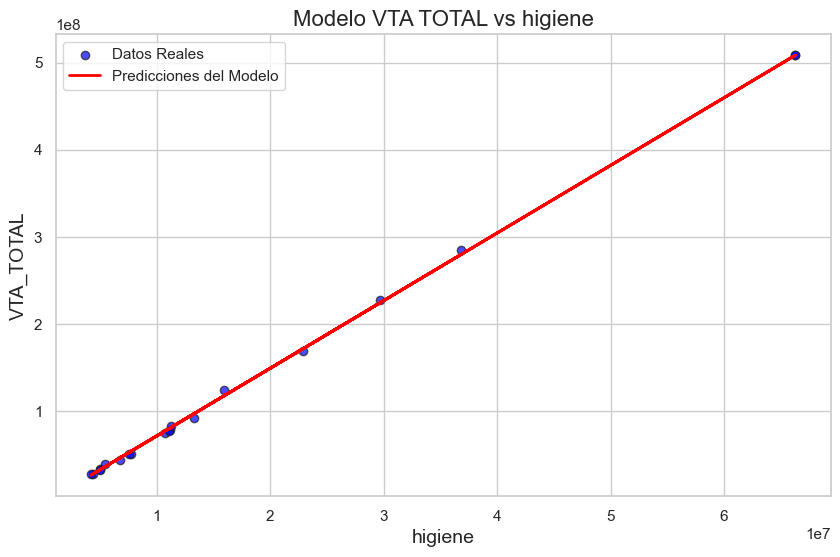

c:\Users\davyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


VTA_TOTAL VS  indumentaria
Predicciones: [9.09345108e+07 4.02885999e+07 1.23036193e+08 5.13339598e+08], Reales: [7.85945218e+07 4.48494460e+07 1.24840320e+08 5.08379434e+08]
RMSE : 19629807.897121448
R2 : 0.9817368466341372


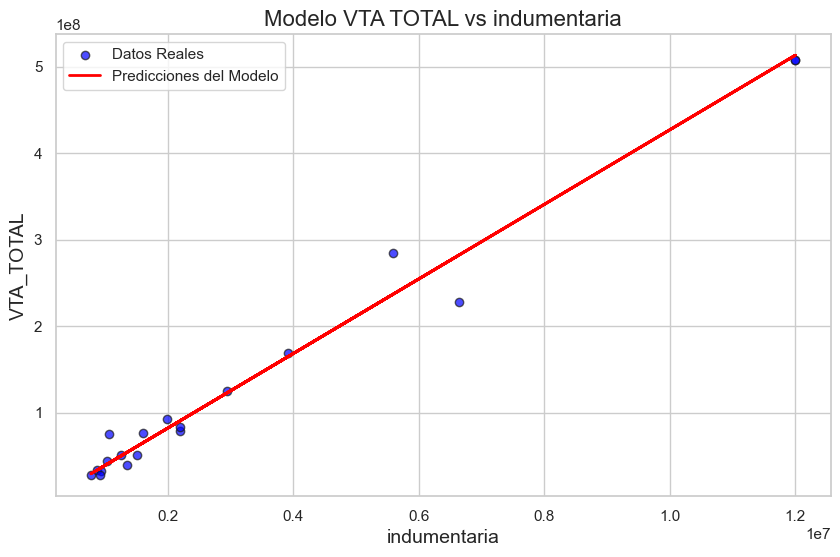

c:\Users\davyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


VTA_TOTAL VS  electronica
Predicciones: [8.93379125e+07 4.29558362e+07 1.28195498e+08 5.31303970e+08], Reales: [7.85945218e+07 4.48494460e+07 1.24840320e+08 5.08379434e+08]
RMSE : 35316066.95434133
R2 : 0.9408862745537779


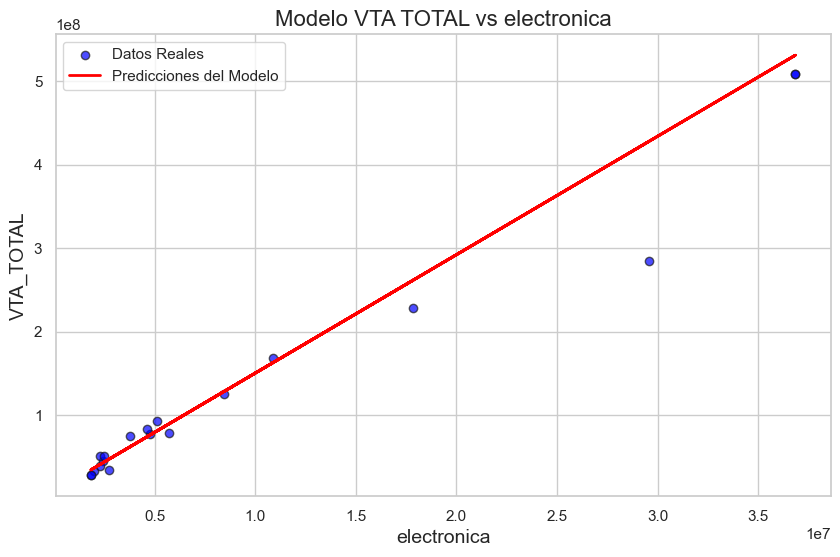

c:\Users\davyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


VTA_TOTAL VS  otros
Predicciones: [6.79762589e+07 4.58924308e+07 1.38707795e+08 5.16545649e+08], Reales: [7.85945218e+07 4.48494460e+07 1.24840320e+08 5.08379434e+08]
RMSE : 8285636.752206669
R2 : 0.9967461655989699


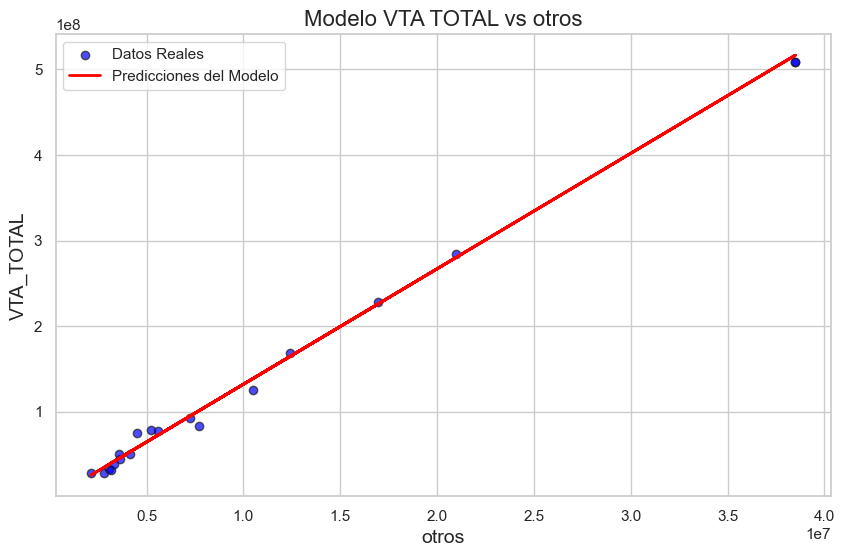

c:\Users\davyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


VTA_TOTAL VS  VTA_TOTAL
Predicciones: [7.85945218e+07 4.48494460e+07 1.24840320e+08 5.08379434e+08], Reales: [7.85945218e+07 4.48494460e+07 1.24840320e+08 5.08379434e+08]
RMSE : 0.0
R2 : 1.0


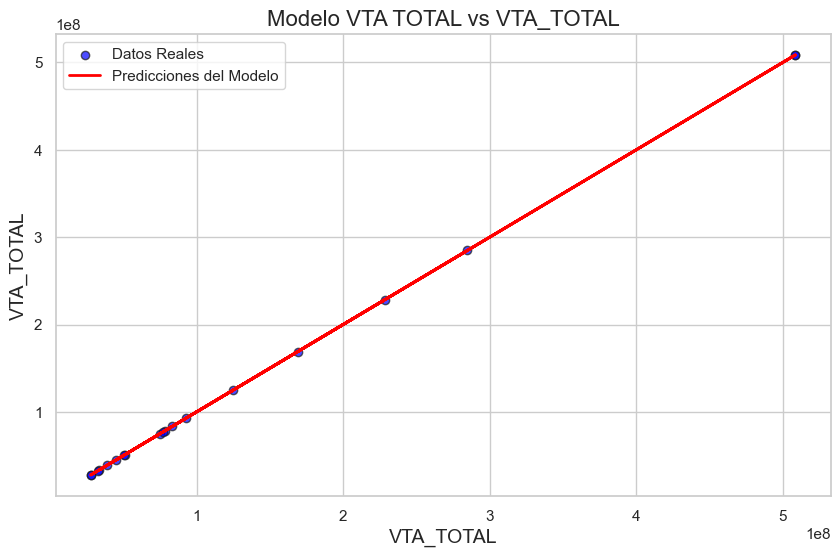

In [45]:
col = data.columns
for i in col: # Para diferentes valores de independientes
   Valor_ind(i)




### Conclusiones Generales:

Altos Coeficientes de Determinación (R²): Los modelos de regresión lineal han mostrado un excelente ajuste en la mayoría de las categorías, indicando que explican una gran parte de la variabilidad en las ventas.

Variabilidad y Fluctuaciones: Los altos valores de RMSE en categorías como Higiene, Indumentaria, Electrónica y Otros sugieren que hay grandes fluctuaciones en las ventas, lo que puede ser un desafío en términos de precisión absoluta.

**Modelo Robusto para Comestibles: La categoría de Comestibles tiene tanto un RMSE más bajo como un R² extremadamente alto, lo que indica un modelo particularmente robusto y preciso para esta categoría**